# Change points

*Joseph Hall (October 2019)*

This notebook demonstrates the use of the `ChangePoints` kernel, which can be used to describe one-dimensional functions that contain a number of change-points, or regime changes. The kernel makes use of sigmoids ($\sigma$) to blend smoothly between different kernels. For example, a single change-point kernel is defined by:

\begin{equation}
\textrm{cov}(f(x), f(y)) = k_1(x, y)\cdot\bar{\sigma}(x, y) + k_2(x, y)\cdot\sigma(x, y)
\end{equation}

where $\sigma(x, y) = \sigma(x)\cdot\sigma(y)$ and $\bar{\sigma}(x, y) = (1 - \sigma(x))\cdot(1 - \sigma(y))$. The sigmoid ($\sigma$) is parameterized by a location ($l$) and a width ($w$).

In [1]:
import gpflow
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)  # for reproducibility of this notebook

plt.style.use("ggplot")
%matplotlib inline


def plotkernelsample(k, ax, xmin=-3, xmax=3, title=None):
    xx = np.linspace(xmin, xmax, 100)[:, None]
    ax.plot(xx, np.random.multivariate_normal(np.zeros(100), k(xx), 3).T)
    ax.set_title(title)

We demonstrate the use of the kernel by drawing a number of samples from different parameterizations. Firstly, a simple single change-point between two kernels of differing lengthscales.

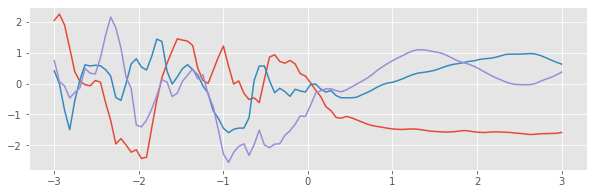

In [2]:
np.random.seed(1)

base_k1 = gpflow.kernels.Matern32(lengthscales=0.2)
base_k2 = gpflow.kernels.Matern32(lengthscales=2.0)
k = gpflow.kernels.ChangePoints([base_k1, base_k2], [0.0], steepness=5.0)

f, ax = plt.subplots(1, 1, figsize=(10, 3))
plotkernelsample(k, ax)

Secondly, an implementation of a "change window" in which we change from one kernel to another, then back to the original.

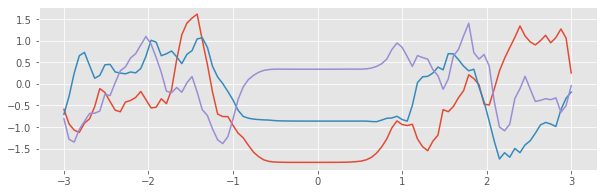

In [3]:
np.random.seed(3)

base_k1 = gpflow.kernels.Matern32(lengthscales=0.3)
base_k2 = gpflow.kernels.Constant(1)
k = gpflow.kernels.ChangePoints([base_k1, base_k2, base_k1], locations=[-1, 1], steepness=10.0)

f, ax = plt.subplots(1, 1, figsize=(10, 3))
plotkernelsample(k, ax)

And finally, allowing different change-points to occur more or less abruptly by defining different steepness parameters.

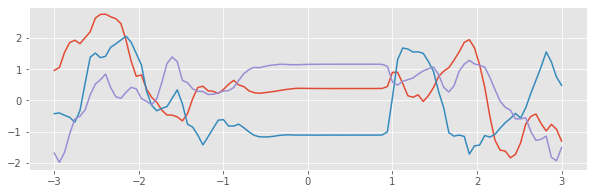

In [4]:
np.random.seed(2)

base_k1 = gpflow.kernels.Matern32(lengthscales=0.3)
base_k2 = gpflow.kernels.Constant()
k = gpflow.kernels.ChangePoints(
    [base_k1, base_k2, base_k1], locations=[-1, 1], steepness=[5.0, 50.0]
)

f, ax = plt.subplots(1, 1, figsize=(10, 3))
plotkernelsample(k, ax)